# https://portal.vision.cognitive.azure.com/gallery/ocr

In [4]:
#! python -m pip install  -U --ignore-installed  azure-ai-vision-imageanalysis

In [3]:
#! pip install  -U --ignore-installed python-dotenv

In [50]:
#! pip install  -U --ignore-installed  pdf2image

In [20]:
import os
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential
import time
import datetime
from IPython import embed
from dotenv import load_dotenv
import json
env_path = os.path.join("keys", ".env")
load_dotenv(env_path)

True

In [17]:
# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
try:
    endpoint = os.getenv("ENDPOINT")
    key = os.getenv("KEY")
except KeyError:
    print("Missing environment variable 'VISION_ENDPOINT' or 'VISION_KEY'")
    print("Set them before running this sample.")
    exit()


# Create an Image Analysis client
client = ImageAnalysisClient(endpoint=endpoint, credential=AzureKeyCredential(key))


image_file = "data/senior_python_developer_nlplogix2_sm.jpg"

In [88]:
help(VisualFeatures)

Help on class VisualFeatures in module azure.ai.vision.imageanalysis.models._enums:

class VisualFeatures(builtins.str, enum.Enum)
 |  VisualFeatures(value, names=None, *, module=None, qualname=None, type=None, start=1, boundary=None)
 |  
 |  The visual features supported by the Image Analysis service.
 |  
 |  Method resolution order:
 |      VisualFeatures
 |      builtins.str
 |      enum.Enum
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __format__(self, format_spec)
 |      Default object formatter.
 |  
 |  __new__(cls, value)
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  CAPTION = <VisualFeatures.CAPTION: 'caption'>
 |  
 |  DENSE_CAPTIONS = <VisualFeatures.DENSE_CAPTIONS: 'denseCaptions'>
 |  
 | 

In [19]:
# Use Read API to read text in image
time1 = datetime.datetime.now()
with open(image_file, mode="rb") as image_data:
    # Wait for the asynchronous operation to complete

    read_results = client.analyze(
        image_data=image_data,
        visual_features=[VisualFeatures.READ],
    )

    # Print text (OCR) analysis results to the console
    print(" Read:")
    if read_results.read is not None:
        for line in read_results.read.blocks[0].lines:
            print(f"   Line: '{line.text}'")#, Bounding box {line.bounding_polygon}")
            # for word in line.words:
            #     print(
            #         f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}"
            #     )
time2 = datetime.datetime.now()

 Read:
   Line: '· Excellent analytical skills and strong written and verbal communication skills'
   Line: 'Requirements (Nice-to-Haves):'
   Line: '· Experience or exposure to OCR technologies'
   Line: '· Experience or exposure to image processing algorithms'
   Line: '· Experience or exposure to numpy, scipy, opencv and skimage'
   Line: '· Experience or exposure to scikit-learn'
   Line: '· Experience with C#, Java or JavaScript'
   Line: '· Developing, deploying and scaling Docker components'
   Line: '· General exposure and familiarity with Machine Learning technologies'
   Line: 'Education:'
   Line: 'Bachelor's degree from four-year college or university, preferred; and five years''
   Line: 'experience in general software development or comparable related experience.'
   Line: '· Experience working with one or more major relational database technology (Oracle,'
   Line: 'SQL'
   Line: 'Server, MySQL, PostgreSQL)'
   Line: '· Comfortable working in both Windows and Linux based

In [11]:
read_results.read.keys()

dict_keys(['blocks'])

In [89]:
type(read_results)

azure.ai.vision.imageanalysis.models._models.ImageAnalysisResult

In [25]:
read_results.as_dict()

{'modelVersion': '2023-10-01',
 'metadata': {'width': 3024, 'height': 4032},
 'readResult': {'blocks': [{'lines': [{'text': '· Excellent analytical skills and strong written and verbal communication skills',
      'boundingPolygon': [{'x': 446, 'y': 302},
       {'x': 2514, 'y': 293},
       {'x': 2515, 'y': 351},
       {'x': 446, 'y': 364}],
      'words': [{'text': '·',
        'boundingPolygon': [{'x': 457, 'y': 306},
         {'x': 491, 'y': 306},
         {'x': 489, 'y': 364},
         {'x': 454, 'y': 364}],
        'confidence': 0.851},
       {'text': 'Excellent',
        'boundingPolygon': [{'x': 548, 'y': 305},
         {'x': 782, 'y': 302},
         {'x': 780, 'y': 363},
         {'x': 545, 'y': 364}],
        'confidence': 0.994},
       {'text': 'analytical',
        'boundingPolygon': [{'x': 794, 'y': 302},
         {'x': 1044, 'y': 300},
         {'x': 1042, 'y': 361},
         {'x': 792, 'y': 363}],
        'confidence': 0.993},
       {'text': 'skills',
        'boundi

In [28]:
with open("data/image1.json", "w") as f:
    json.dump(read_results.as_dict(), f)

In [29]:
result= read_results.as_dict()

In [90]:
result.keys()

dict_keys(['modelVersion', 'metadata', 'readResult'])

In [91]:
result['modelVersion']

'2023-10-01'

In [48]:
result['metadata']

{'width': 3024, 'height': 4032}

In [34]:
result['readResult'].keys()

dict_keys(['blocks'])

In [64]:
len(result['readResult']['blocks'][0]['lines'])

27

In [94]:
#
result['readResult']['blocks'][0]['lines'][0]

{'text': '· Excellent analytical skills and strong written and verbal communication skills',
 'boundingPolygon': [{'x': 446, 'y': 302},
  {'x': 2514, 'y': 293},
  {'x': 2515, 'y': 351},
  {'x': 446, 'y': 364}],
 'words': [{'text': '·',
   'boundingPolygon': [{'x': 457, 'y': 306},
    {'x': 491, 'y': 306},
    {'x': 489, 'y': 364},
    {'x': 454, 'y': 364}],
   'confidence': 0.851},
  {'text': 'Excellent',
   'boundingPolygon': [{'x': 548, 'y': 305},
    {'x': 782, 'y': 302},
    {'x': 780, 'y': 363},
    {'x': 545, 'y': 364}],
   'confidence': 0.994},
  {'text': 'analytical',
   'boundingPolygon': [{'x': 794, 'y': 302},
    {'x': 1044, 'y': 300},
    {'x': 1042, 'y': 361},
    {'x': 792, 'y': 363}],
   'confidence': 0.993},
  {'text': 'skills',
   'boundingPolygon': [{'x': 1056, 'y': 300},
    {'x': 1187, 'y': 298},
    {'x': 1185, 'y': 360},
    {'x': 1054, 'y': 361}],
   'confidence': 0.993},
  {'text': 'and',
   'boundingPolygon': [{'x': 1199, 'y': 298},
    {'x': 1294, 'y': 298},
 

In [71]:
lines_box=[]
if result.get("readResult") is not None:
        for line in result['readResult']['blocks'][0]['lines']:
            line_d = {}
            line_d['text'] = line['text']
            xys = []
            yys =[]
            for dicct in line['boundingPolygon']:
                xys.append(dicct['x'])
                yys.append(dicct['y'])
            line_d['xs'] = xys
            line_d['ys'] = yys
            line_d['ymin'] = np.min(yys)
            line_d['ymax'] = np.max(yys)
            line_d['xmin'] = np.min(xys)
            line_d['xmax'] = np.max(xys)
            lines_box.append(line_d)
            

In [72]:
lines_box[-1]

{'text': '· General exposure and familiarity with Machine Learning technologies',
 'xs': [436, 2395, 2396, 437],
 'ys': [3590, 3567, 3638, 3656],
 'ymin': 3567,
 'ymax': 3656,
 'xmin': 436,
 'xmax': 2396}

In [57]:
import json
import os
import pathlib
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
from pdf2image import convert_from_path
from scipy import ndimage

In [53]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (12,20))
    plt.imshow(image, aspect="auto")
    plt.title(title)
    plt.grid(False)
    plt.show()

In [54]:
im = cv2.imread(image_file)

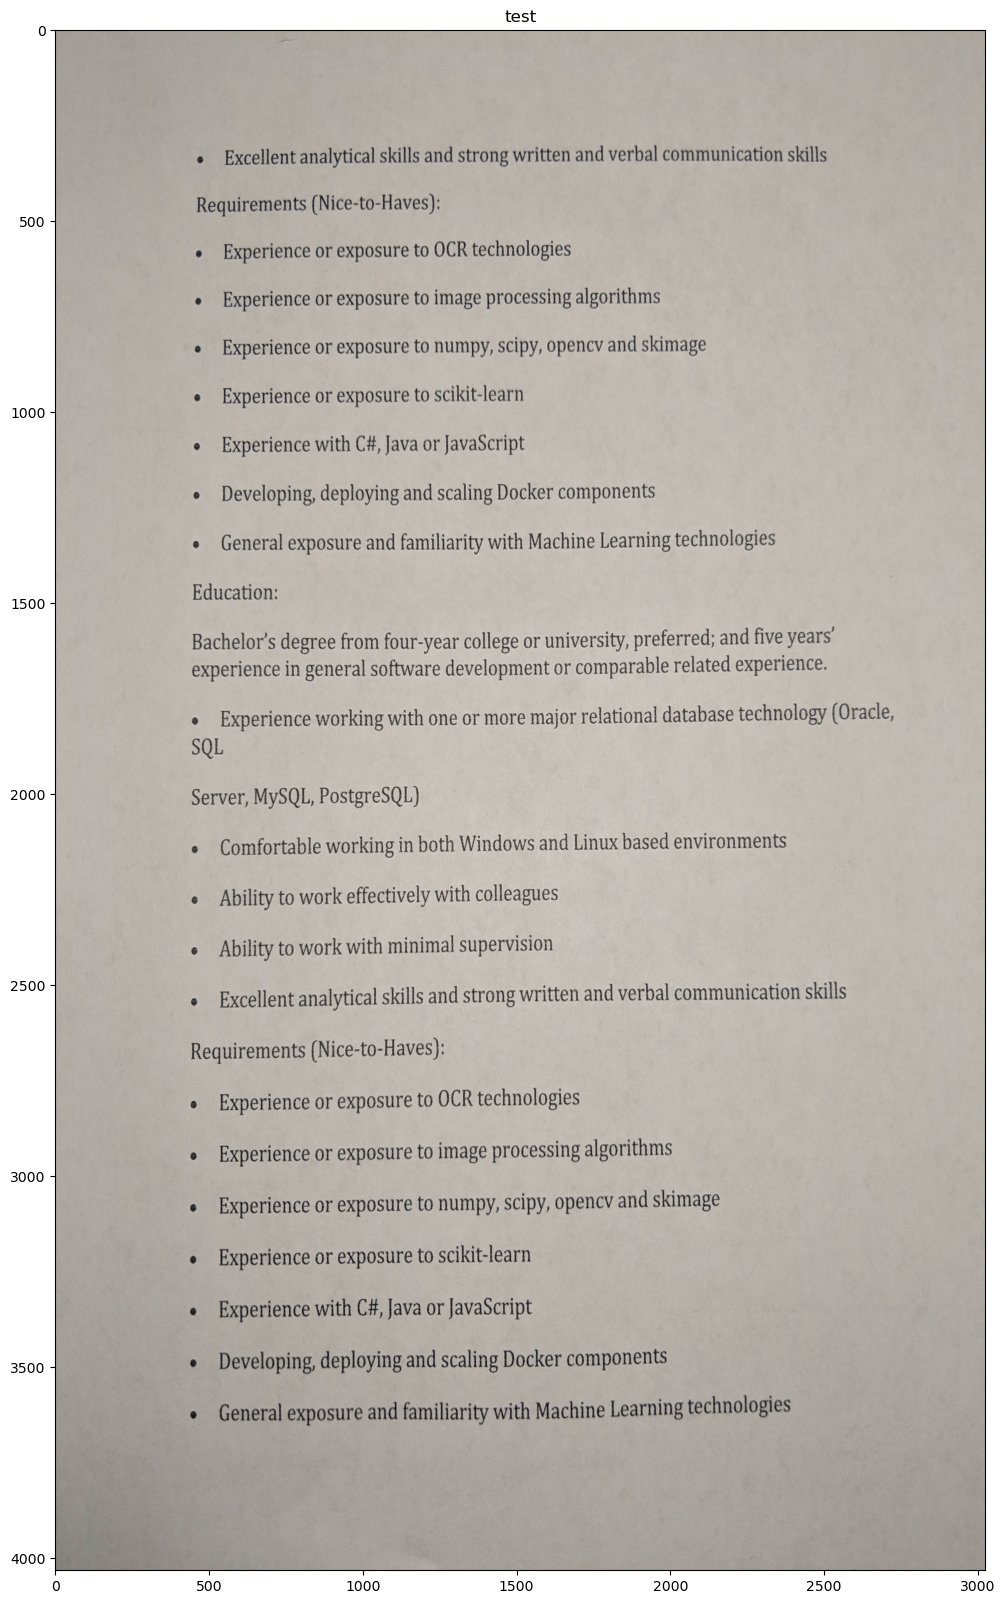

In [55]:
plt_imshow("test", im)

In [86]:
im = cv2.imread(image_file)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im = cv2.drawContours(im,contours,-1,(0,255,0),3)

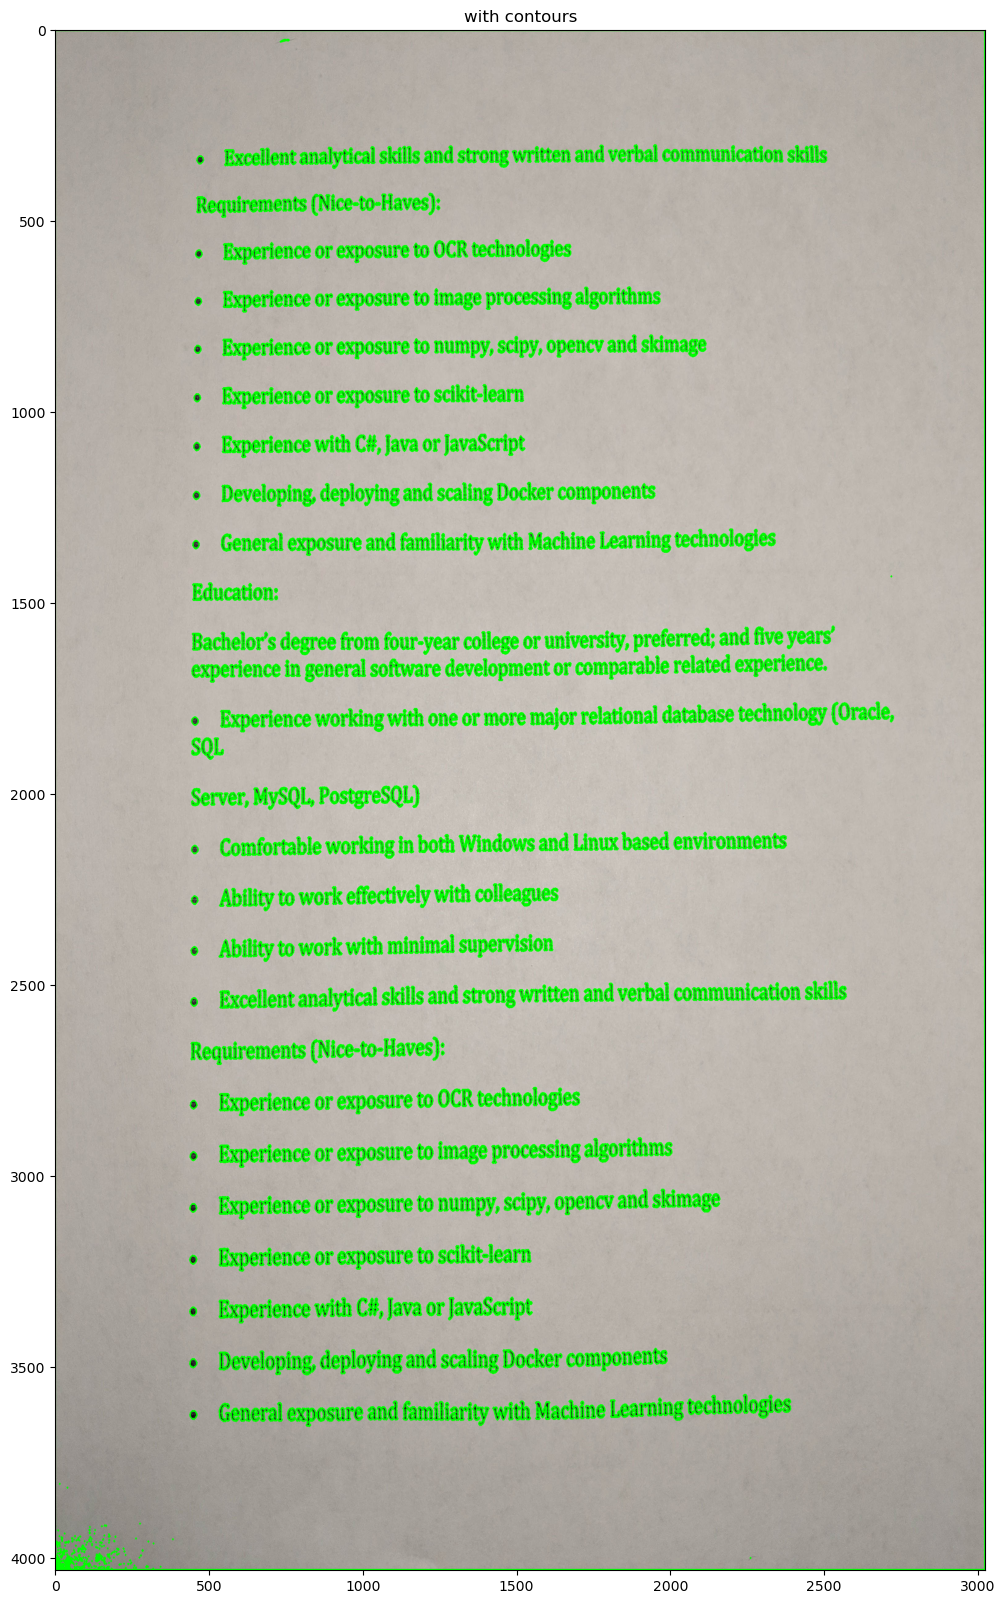

In [87]:
plt_imshow("with contours", im)

In [82]:
#definition of font and font color
font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,0,0)
thickness              = 2
lineType               = 2


im = cv2.imread(image_file)

In [83]:
lines_box[-1]

{'text': '· General exposure and familiarity with Machine Learning technologies',
 'xs': [436, 2395, 2396, 437],
 'ys': [3590, 3567, 3638, 3656],
 'ymin': 3567,
 'ymax': 3656,
 'xmin': 436,
 'xmax': 2396}

In [84]:
for l,key  in zip(lines_box, range(len(lines_box))):
    y_minc, y_maxc, x_minc , x_maxc = l.get('ymin'), l.get('ymax'),l.get('xmin'),l.get('xmax')
    # get top left vertex and bottom right vertex of bounding box
    x1c = (x_minc , y_maxc)
    x2c = (x_maxc , y_minc)
    #draw a red rectangule
    cv2.rectangle(im, np.int32(x1c), np.int32(x2c),  (0,0,255), 2)
    # depending of the key we separate more the text with the key from the bottom left corner
    if key < 10 :
        bottomLeftCornerOfText = (np.int32(x_minc - 25),  np.int32(y_maxc ))
    elif key < 100:
        bottomLeftCornerOfText = (np.int32(x_minc - 45),  np.int32(y_maxc ))
    else:
        bottomLeftCornerOfText = (np.int32(x_minc - 65),  np.int32(y_maxc))
    # draw text on the image
    text = str(key) +  " " + l.get('text')
    cv2.putText(im, text, bottomLeftCornerOfText, font, fontScale, fontColor, thickness, lineType)

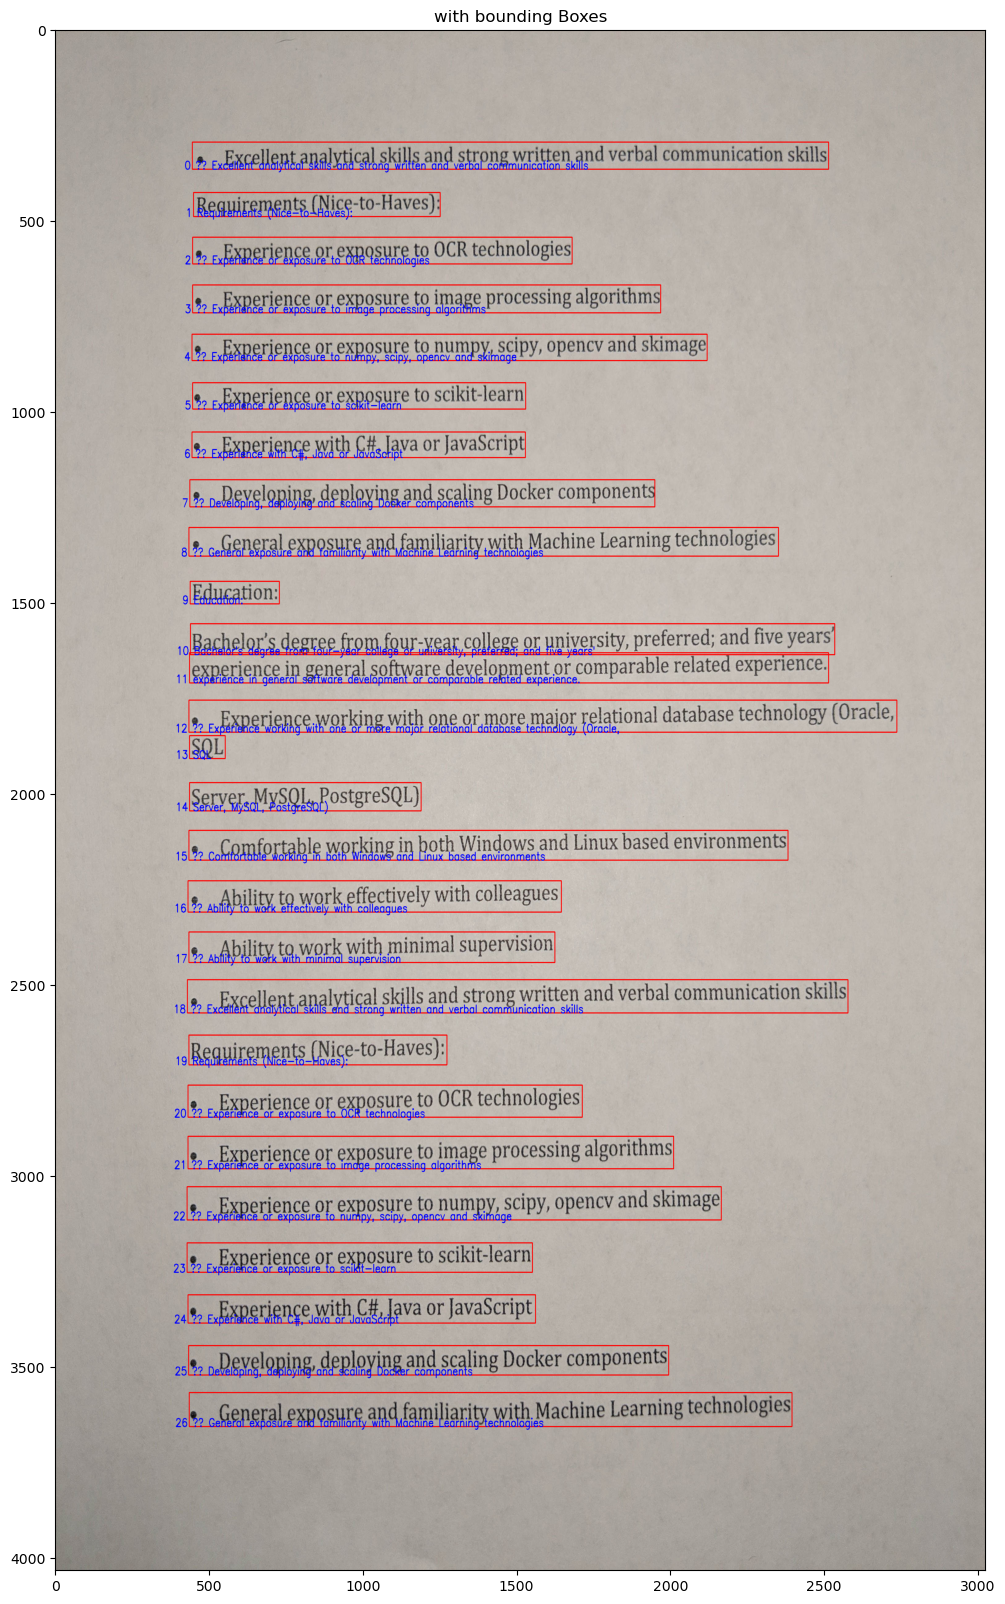

In [85]:
plt_imshow("with bounding Boxes", im)